In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('D:/Downloads/Week/Week 2/WineQT.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [465]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


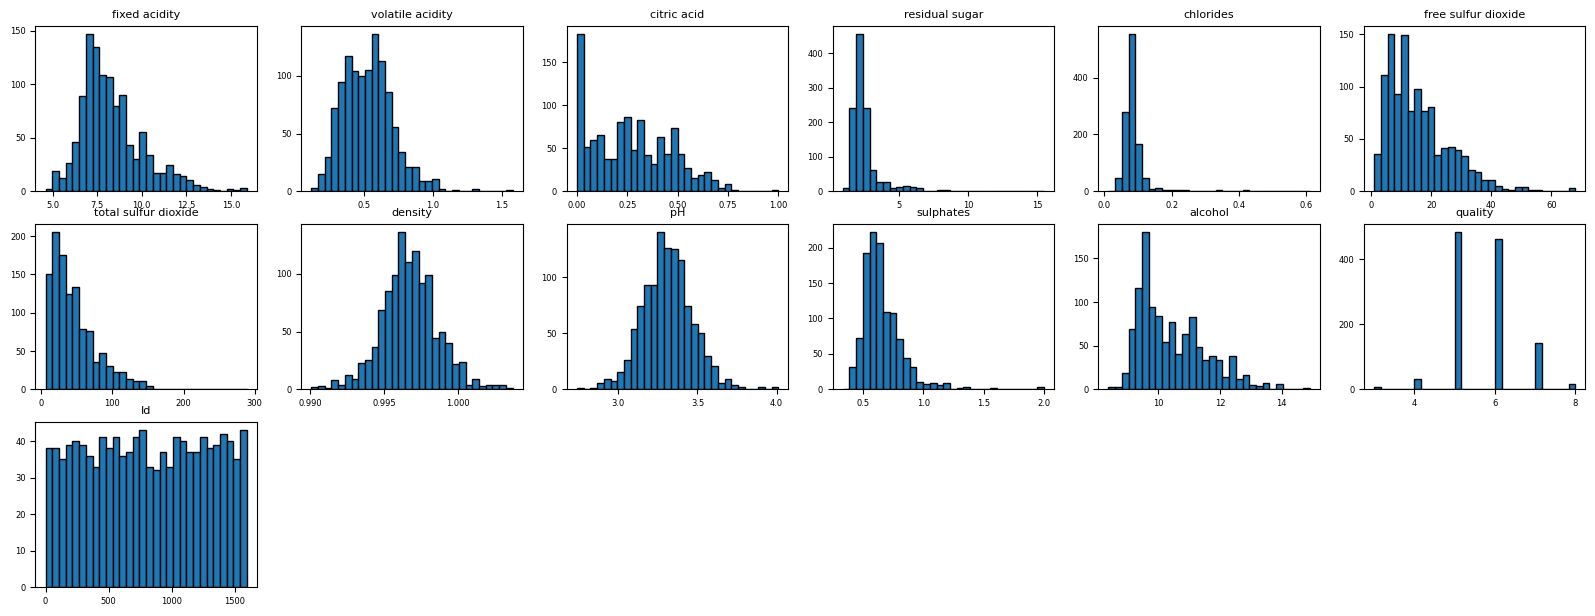

In [10]:
plt.figure(figsize=(20, 15))
numeric_cols = df.select_dtypes(include=['int64','float']).columns
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 6, i + 1)  
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(col, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.show()


In [11]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [12]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

In [340]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [475]:
df.duplicated().sum()

np.int64(1168)

In [18]:
def map_quality(q):
    if q <= 4:
        return "Low"
    elif q <= 6:
        return "Medium"
    else:
        return "High"

df['quality_class'] = df['quality'].apply(map_quality)


In [424]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [14]:
df.drop_duplicates(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


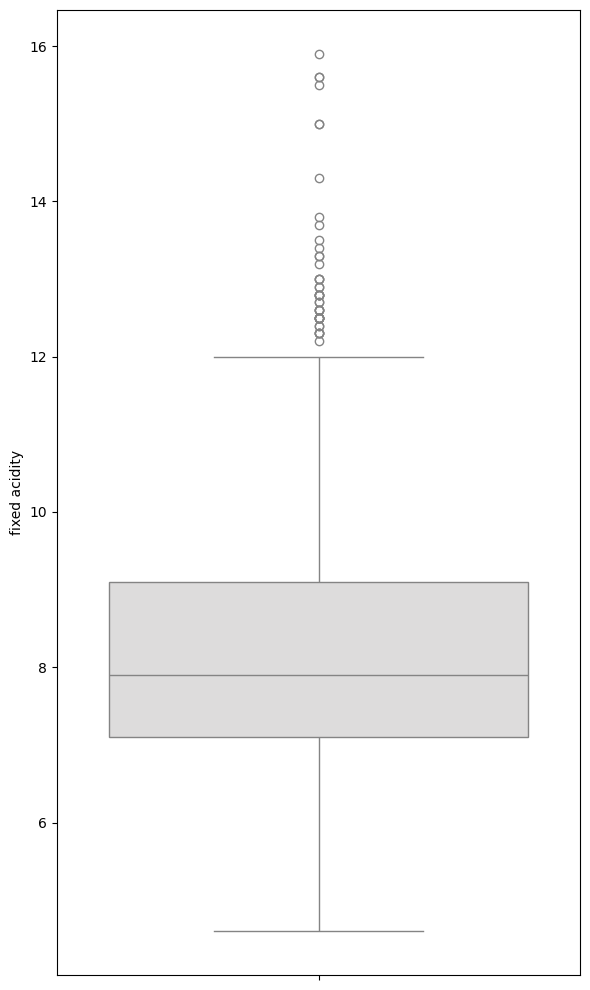

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


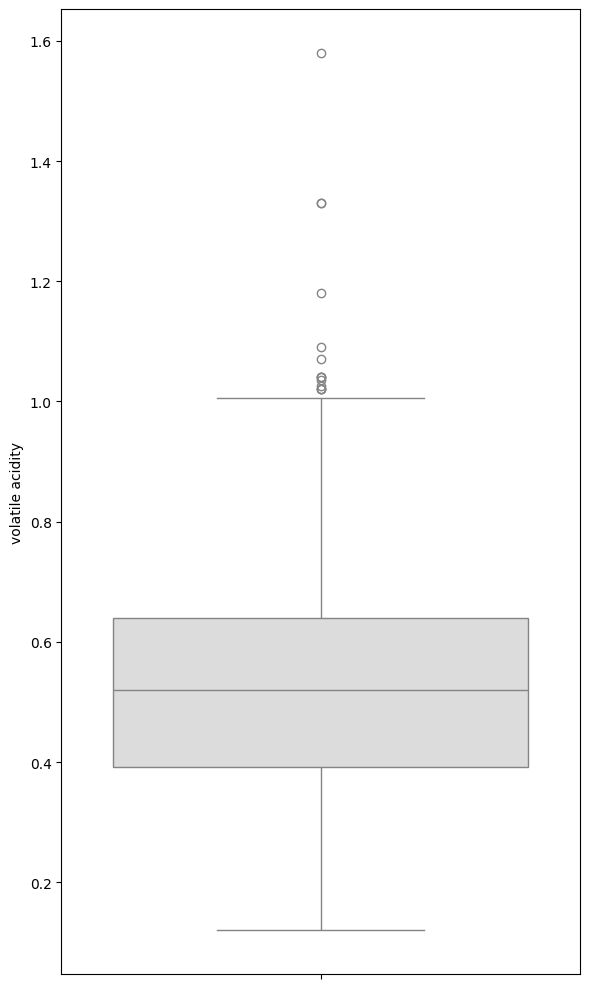

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


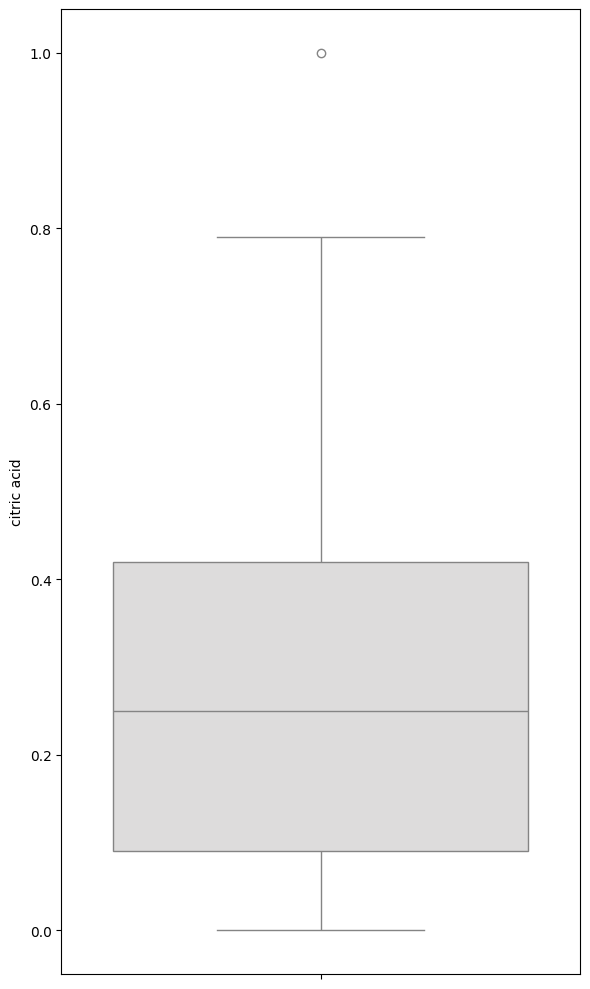

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


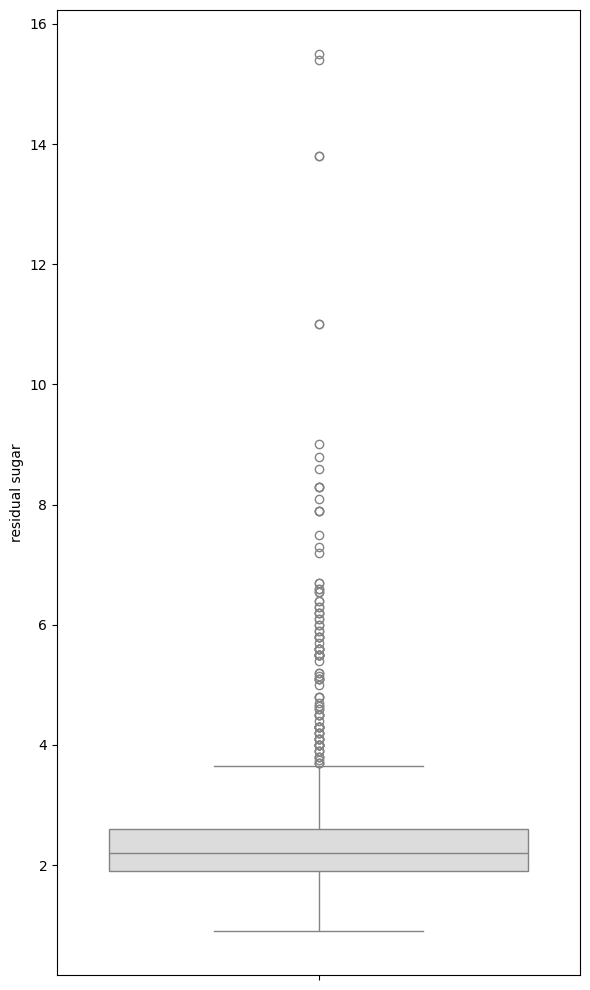

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


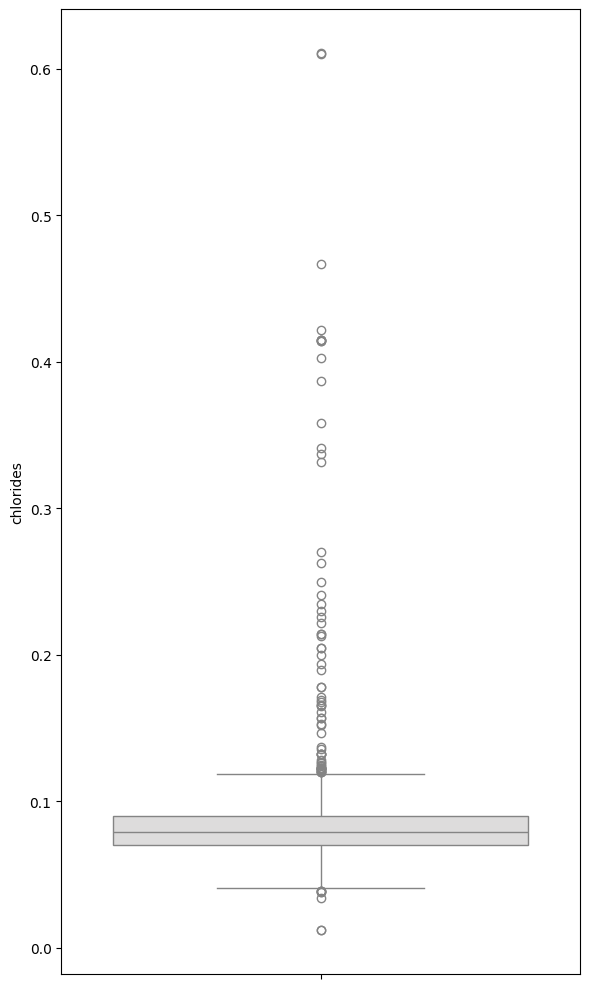

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


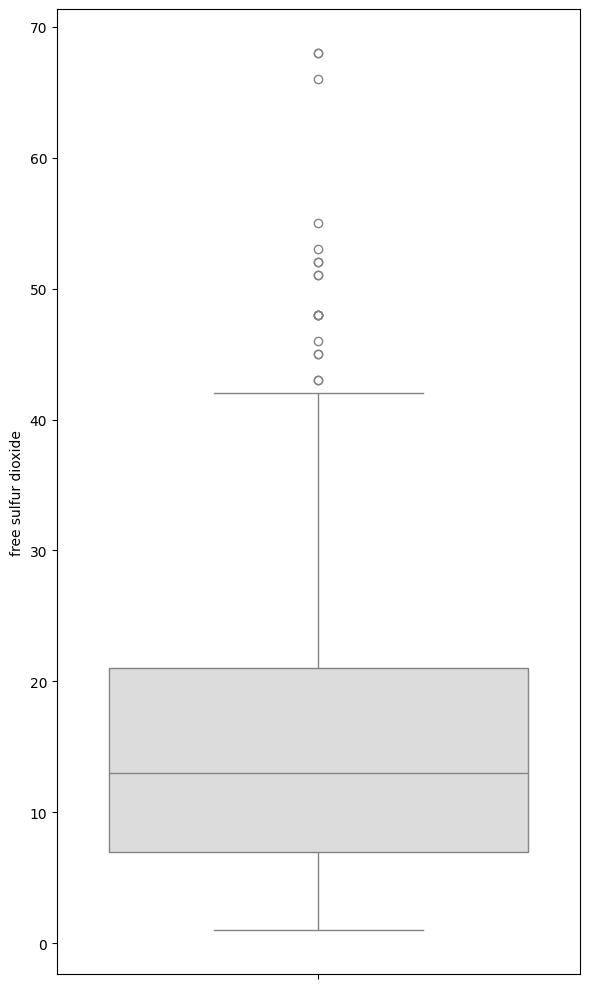

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


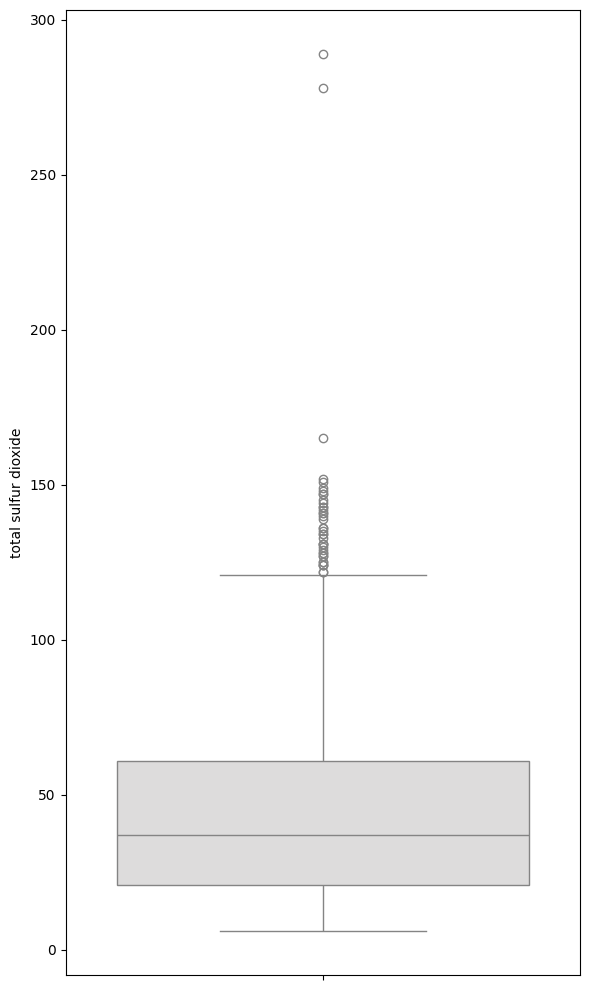

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


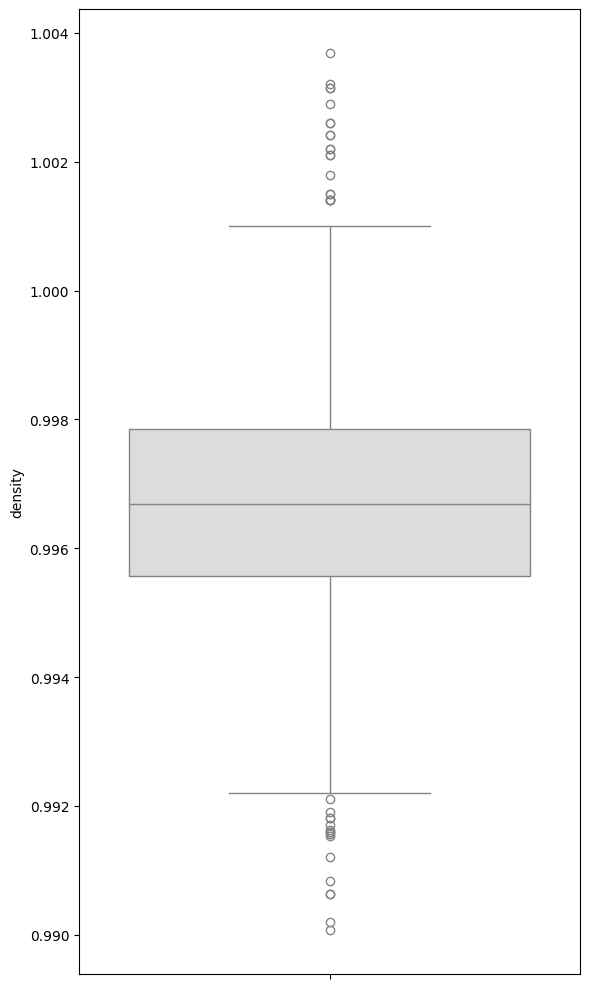

C:\Users\Dell\AppData\Local\Temp\ipykernel_19632\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


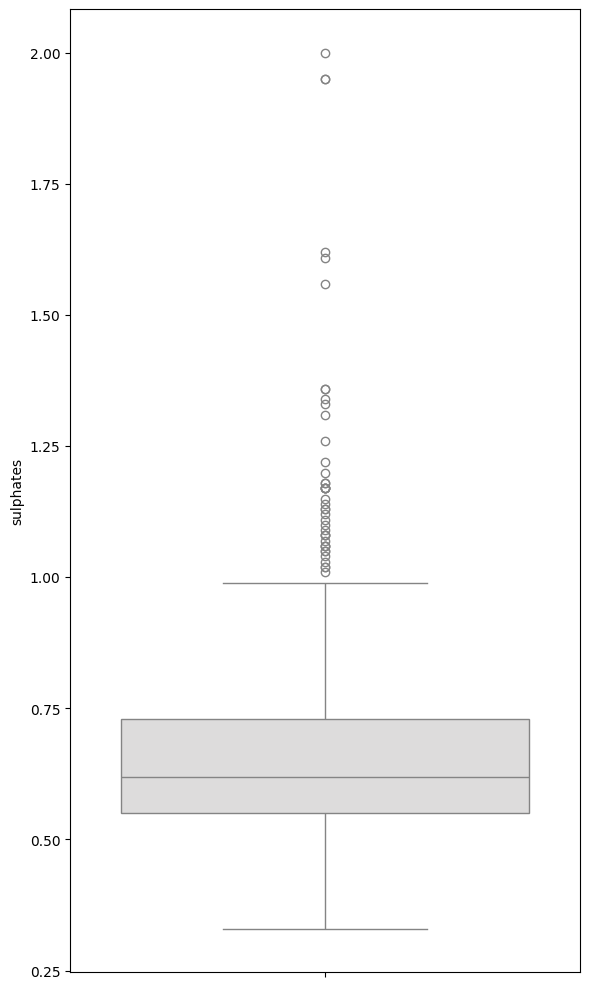

In [15]:
columns=['fixed acidity','volatile acidity','citric acid',	'residual sugar','chlorides','free sulfur dioxide',	'total sulfur dioxide','density','sulphates']
for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()

In [16]:
columns=['fixed acidity','volatile acidity','citric acid',	'residual sugar','chlorides','free sulfur dioxide',	'total sulfur dioxide','density','sulphates']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1* IQR
    upper_bound = Q3 + 1* IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_class'] = le.fit_transform(df['quality_class'])

In [20]:
X = df[['volatile acidity', 'citric acid','chlorides', 'density', 'sulphates','alcohol','total sulfur dioxide']]
y = df['quality_class']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [23]:
pipeline={
    'KNN':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',KNeighborsClassifier(n_neighbors=3))
    ]),
    'Decsion tree':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',DecisionTreeClassifier(max_depth=5,random_state=42, splitter='random',criterion='entropy'))
    
    ]),
    'Naive Byes':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',GaussianNB(var_smoothing=1e-8))
    ]),
    'Random Forest':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',RandomForestClassifier(random_state=42))
    ]),
    'Lasso (LogReg)': Pipeline([
    ('scalar', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42))
        ]),
}

In [24]:
for name,model in pipeline.items():
    print(name)
    model.fit(X_train,y_train)
    Train_pred=model.predict(X_train)
    Test_pred=model.predict(X_test)
    print('Training Accuracy',accuracy_score(Train_pred,y_train))
    print('Testing Accuracy',accuracy_score(Test_pred,y_test))

KNN
Training Accuracy 0.9014778325123153
Testing Accuracy 0.8275862068965517
Decsion tree
Training Accuracy 0.9285714285714286
Testing Accuracy 0.8505747126436781
Naive Byes
Training Accuracy 0.8719211822660099
Testing Accuracy 0.8505747126436781
Random Forest
Training Accuracy 1.0
Testing Accuracy 0.8850574712643678
Lasso (LogReg)
Training Accuracy 0.896551724137931
Testing Accuracy 0.8620689655172413


d:\Downloads\Week\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [25]:
lasso_model = pipeline['Lasso (LogReg)'].named_steps['classifier']


In [26]:
rf_model = pipeline['Random Forest'].named_steps['classifier']

In [27]:
importances = rf_model.feature_importances_

In [28]:
feature_names=X.columns.to_list()

In [29]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show top features
print(feature_importance_df.head())


                Feature  Importance
5               alcohol    0.168199
3               density    0.162203
0      volatile acidity    0.150115
6  total sulfur dioxide    0.137172
2             chlorides    0.133165


In [30]:
coefs = lasso_model.coef_  

In [194]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,density_alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,9.37932,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,9.76864,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,9.77060,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,9.78040,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.37932,low


In [31]:

for i, class_coef in enumerate(coefs):
    selected_features = [name for name, coef in zip(feature_names, class_coef) if coef != 0]
    print(f"Selected features for class {i}:", selected_features)


Selected features for class 0: ['volatile acidity', 'citric acid', 'chlorides', 'density', 'sulphates', 'alcohol', 'total sulfur dioxide']
Selected features for class 1: ['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol', 'total sulfur dioxide']
Selected features for class 2: ['volatile acidity', 'citric acid', 'chlorides', 'density', 'sulphates', 'alcohol', 'total sulfur dioxide']


In [32]:

from sklearn.model_selection import GridSearchCV

param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']},
    'Lasso (LogReg)': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Lower C = stronger regularization
        'classifier__multi_class': ['ovr'], 

    }
}

In [33]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)


            Model  Train Accuracy  Test Accuracy  CV Accuracy  \
3   Random Forest        0.945813       0.850575     0.903945   
0             KNN        1.000000       0.885057     0.903914   
4  Lasso (LogReg)        0.896552       0.862069     0.894098   
1    Decsion tree        0.896552       0.867816     0.886721   
2      Naive Byes        0.871921       0.850575     0.866938   

                                         Best Params  
3  {'classifier__criterion': 'gini', 'classifier_...  
0  {'classifier__n_neighbors': 9, 'classifier__we...  
4  {'classifier__C': 1, 'classifier__multi_class'...  
1  {'classifier__criterion': 'entropy', 'classifi...  
2               {'classifier__var_smoothing': 1e-09}  


d:\Downloads\Week\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Downloads\Week\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
